### Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 
There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
#checking the shape
df.shape

(30, 17)

The dataset has 30 rows and 17 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


The data set has all numerical columns. The columns are

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors.

The output variable-Number of predicted wins (W)

In [5]:
#checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

The data set doesnt show any null values

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


The features are in different ranges, we will have to scale the data

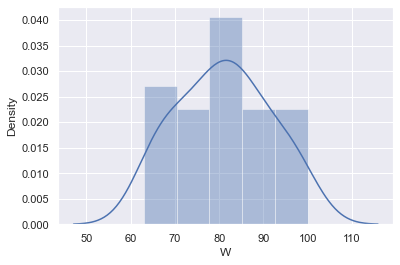

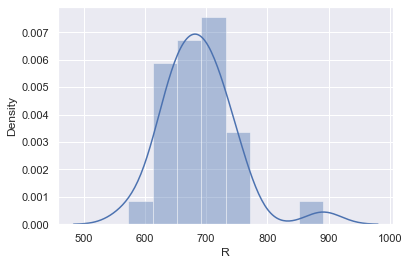

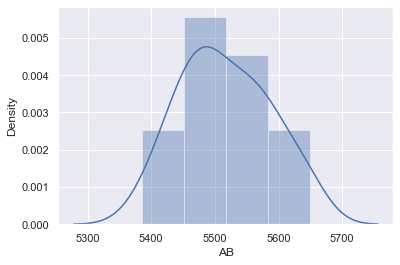

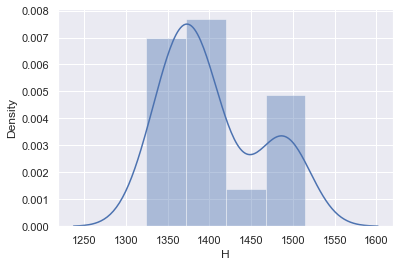

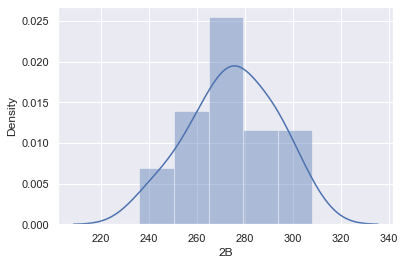

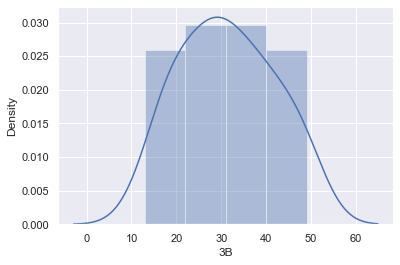

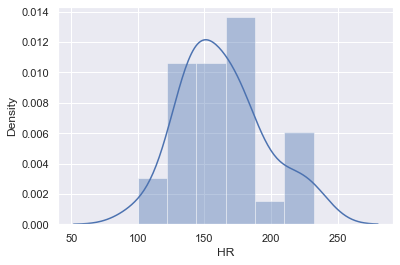

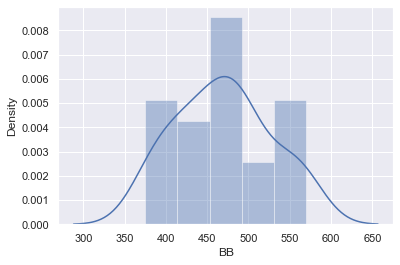

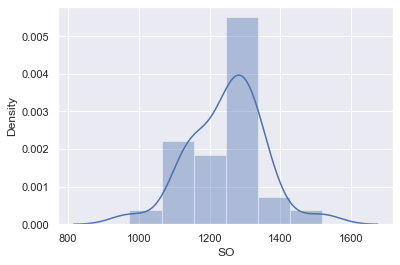

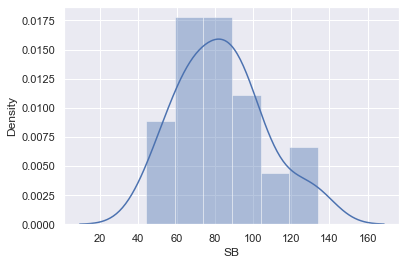

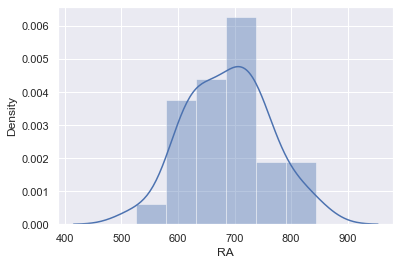

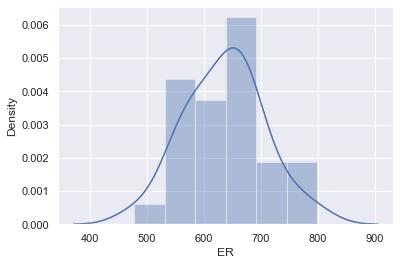

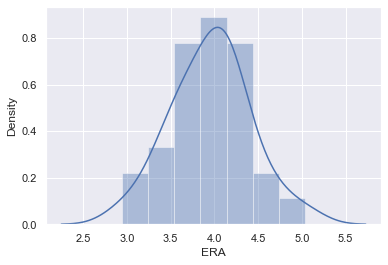

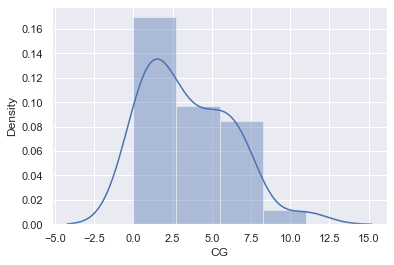

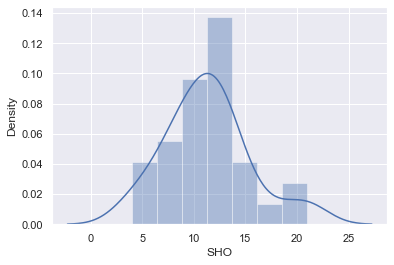

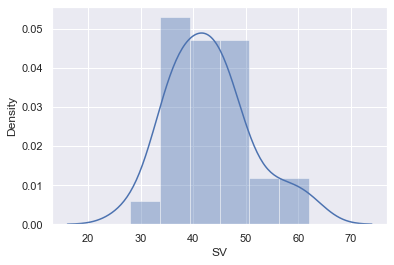

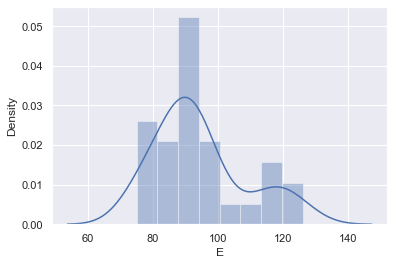

In [7]:
#checking the distribution of the features
cols=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
sns.set_theme(style="darkgrid")
for i in cols:
    plt.subplots()
    sns.distplot(df[i])

Some of the features seems to be under a gaussian distribution, However, the distribution plot shows the possibility of skewness in the data set.

<AxesSubplot:>

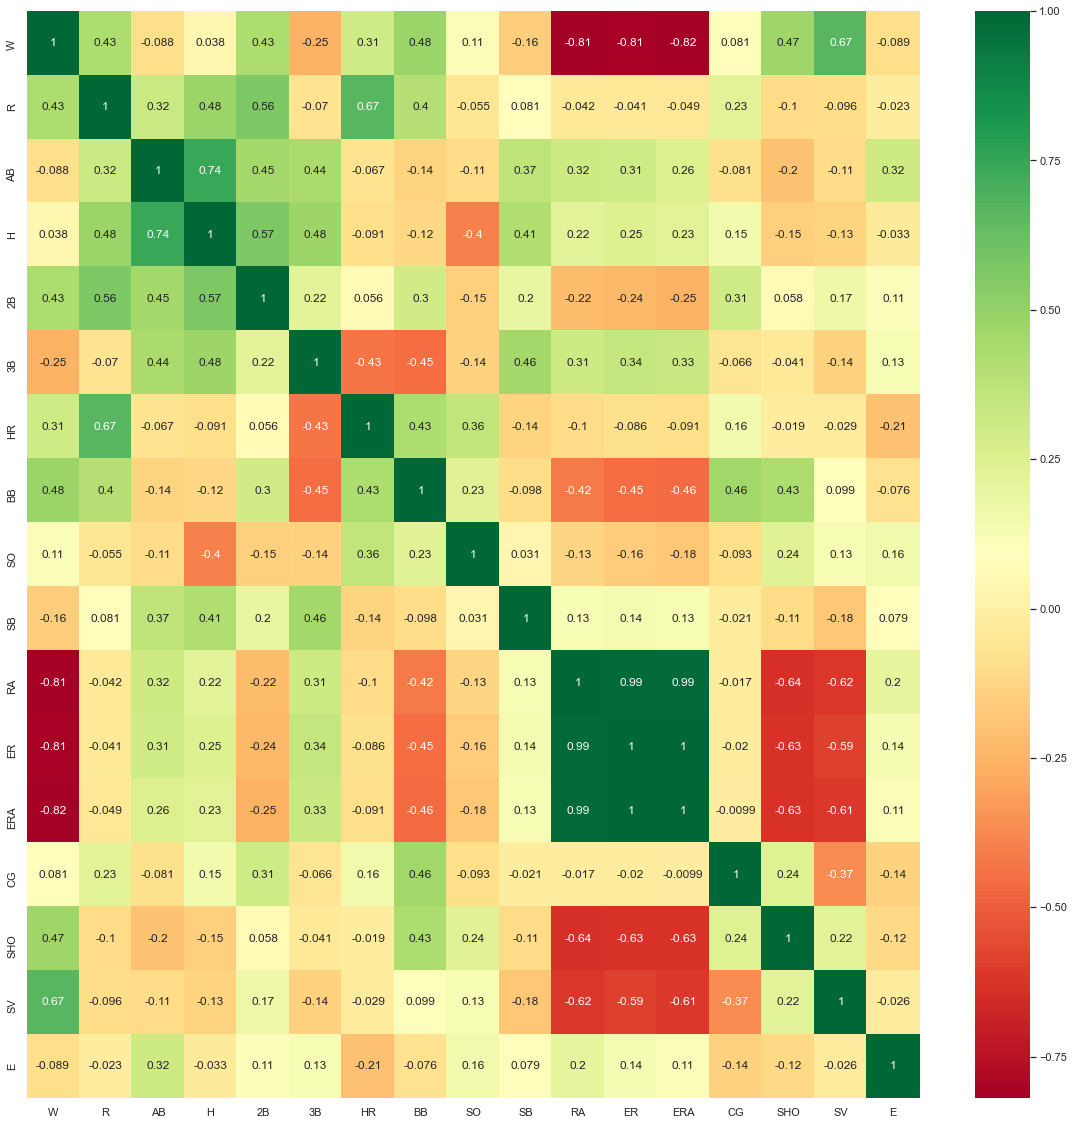

In [8]:
#checking the correlation with heatmap
dfcor=df.corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(dfcor,annot=True,cmap="RdYlGn")

RA,ER,ERA has a negative correlation to the target variable

SV,R,SHO has a possitive correlation

In [9]:
#checking the correlation to the target variable in descending order

dfcor['W'].sort_values(ascending=False)


W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

The correlation of features, from most possitively correlated to most negatively correlated

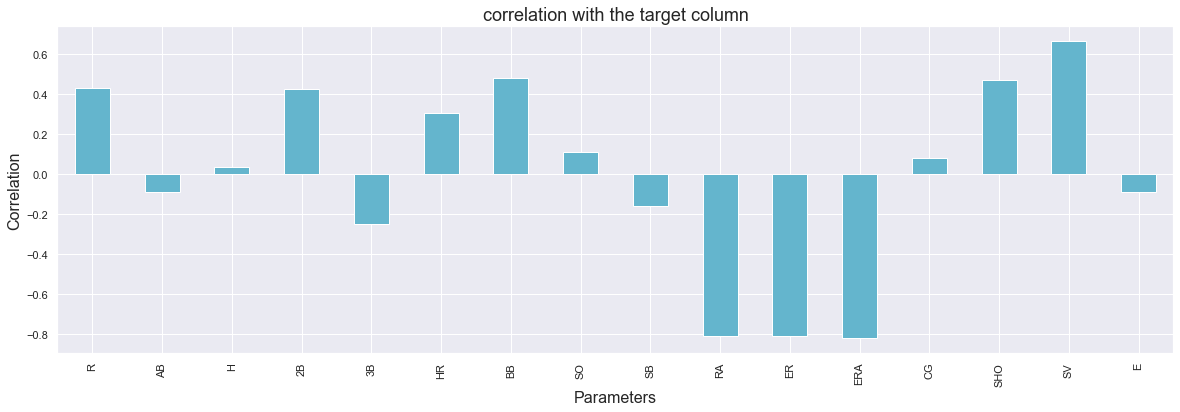

In [10]:
#plotting the correlation to the target column
plt.figure(figsize = (20,6))
dfcor['W'].drop(['W']).plot(kind = 'bar', color = 'c')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

The graph showing both possitive and negative correlation of features to the target column

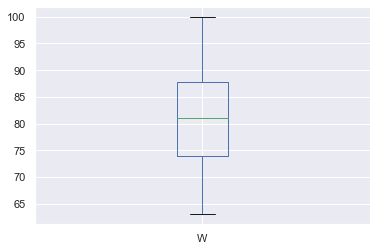

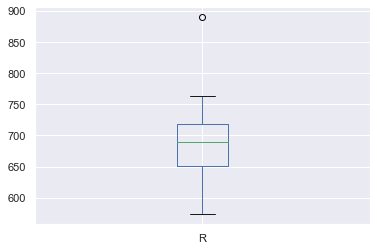

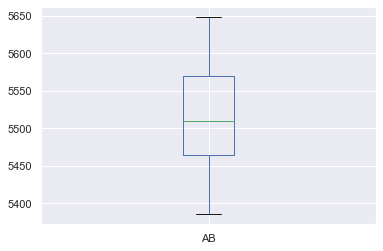

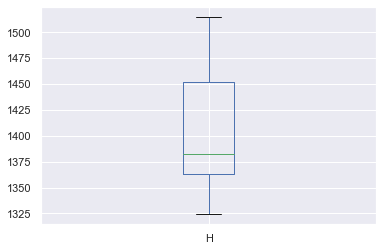

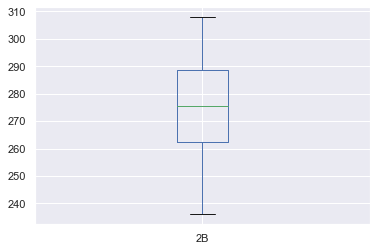

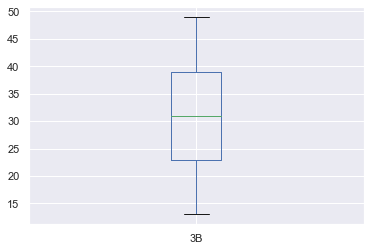

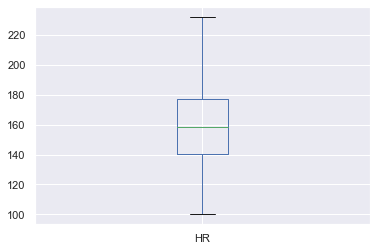

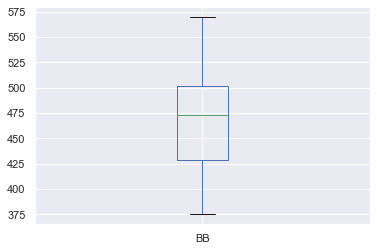

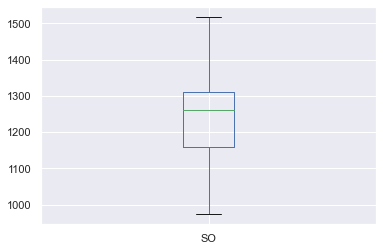

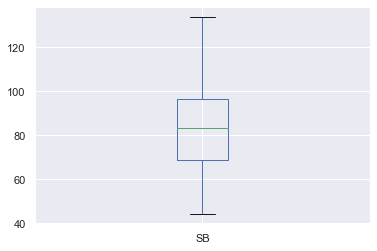

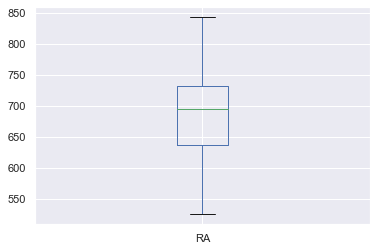

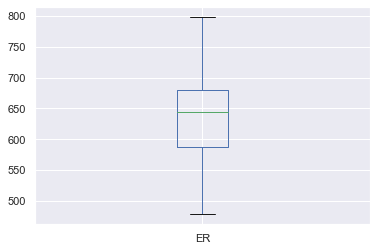

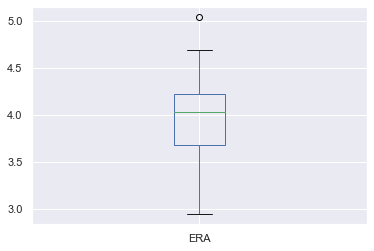

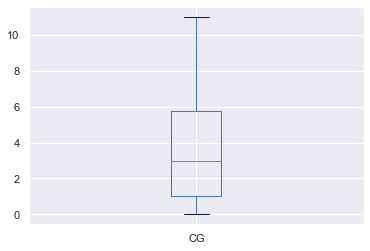

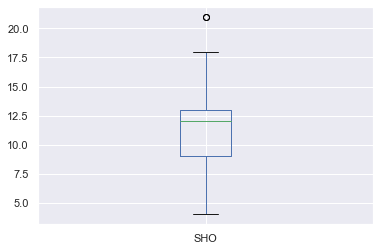

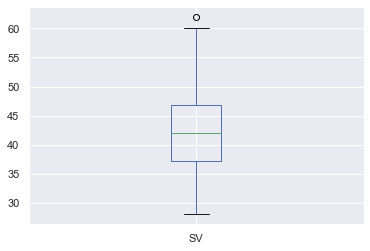

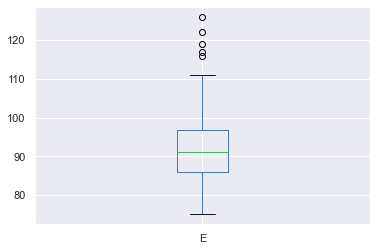

In [11]:
#checking for outliers using box plot
for i in cols:
    df[i].plot.box()
    plt.show()

The plotting doesnt show the presence of a large number of outliers in the dataset, \
however the dataset do have outliers in some of the columns.

<AxesSubplot:xlabel='W', ylabel='SV'>

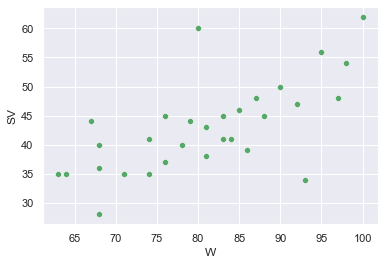

In [12]:
#plotting the relationship between multiple columns
sns.scatterplot(x='W',y='SV',data=df,color='g')

The scatter plot showing the linear realtionship between Wins and Saves

<AxesSubplot:xlabel='W', ylabel='BB'>

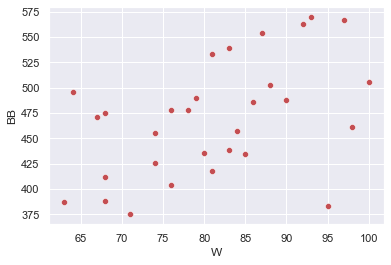

In [13]:
sns.scatterplot(x='W',y='BB',data=df,color='r')

The linear relationship between the target and walks feature

(A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base.)

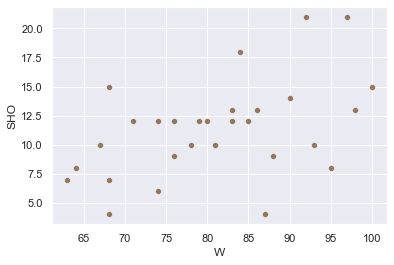

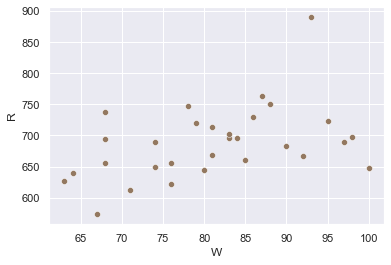

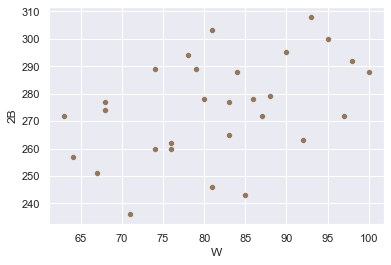

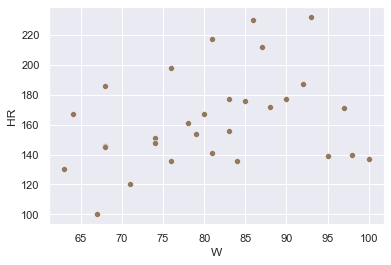

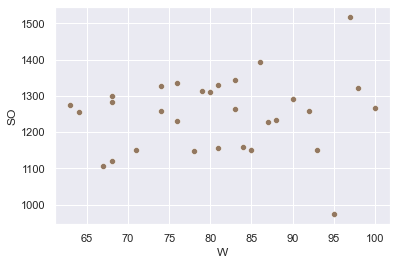

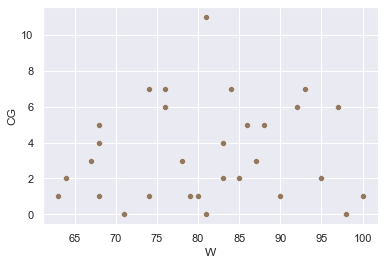

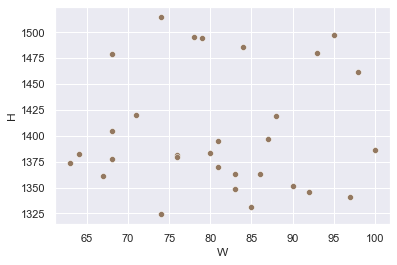

In [14]:
#plotting all the possitive correlations
poscor=['SHO','R','2B','HR','SO','CG','H']
for i in poscor:
    plt.subplots()
    sns.scatterplot(x='W',y=i,data=df,color='C62525')

The possitive correlation between the features to the target variable.

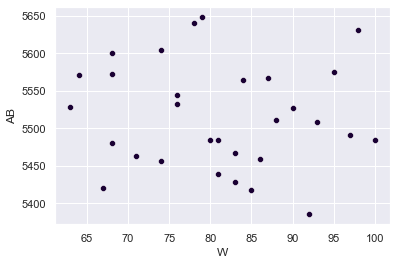

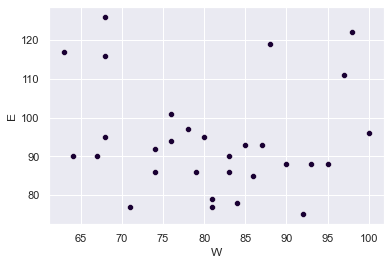

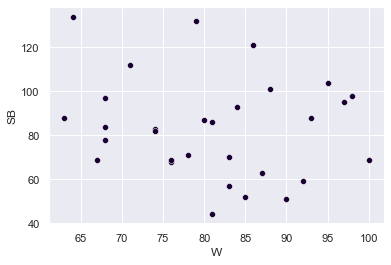

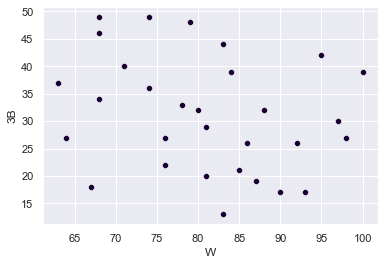

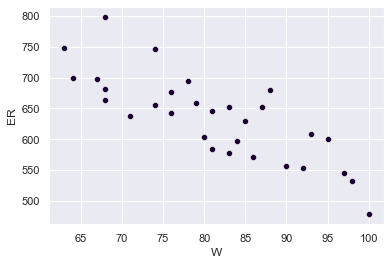

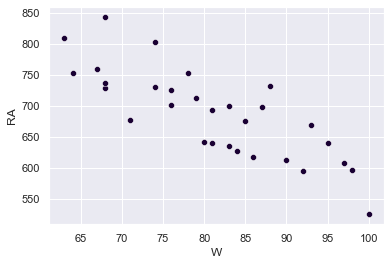

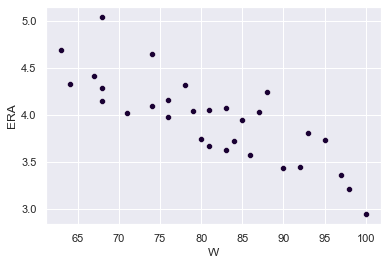

In [15]:
#plotting the negative correlations
negcor=['AB','E','SB','3B','ER','RA','ERA']
for i in negcor:
    plt.subplots()
    sns.scatterplot(x='W',y=i,data=df,color='#190033')
    

The scatterplots showing the negative correlation between the target variable and the features

### checking for outliers

In [16]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

Only one row is showing the presence of outliers

In [17]:
z[5][1]

3.5096470447193067

The value is and outlier and is beyond the threshold.

In [18]:
df_new = df[(z<3).all(axis = 1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [19]:
df = df_new
df.shape

(29, 17)

1 row has been removed as an outlier.

In [20]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

setting a limit -0.5 and 0.5.
H,CG,SHO,SV,E has a skew towards right

In [21]:
df['H']=np.log(df['H'])
df['CG']=np.sqrt(df['CG'])
df['SHO']=np.sqrt(df['SHO'])
df['SV']=np.sqrt(df['SV'])
df['E']=np.log(df['E'])

In [22]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.583308
dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ds = ss.fit_transform(df)
df = ds
df.reshape(-1,1)

array([[ 1.41602548],
       [ 0.95939835],
       [ 0.83008422],
       [ 1.72371546],
       [ 1.55653766],
       [ 1.01084549],
       [-0.76586314],
       [-1.53635899],
       [-2.72762331],
       [ 0.9059529 ],
       [-0.66451353],
       [-0.51114812],
       [-0.51138828],
       [-0.25354897],
       [-0.77743601],
       [ 1.60263096],
       [-0.43529008],
       [ 0.23994704],
       [ 0.33114717],
       [-0.70283074],
       [-0.94985367],
       [ 0.20117132],
       [ 1.20891656],
       [-0.18138864],
       [-0.49502051],
       [ 0.12189552],
       [-0.58531515],
       [ 0.15463823],
       [ 0.23216082],
       [ 0.23895226],
       [-0.25354897],
       [ 0.24747497],
       [ 0.25562074],
       [-0.5978505 ],
       [ 0.04393396],
       [-0.27466646],
       [-1.10025314],
       [-0.08868729],
       [ 1.73332457],
       [-0.2766165 ],
       [-0.69710144],
       [ 1.25294051],
       [-0.9258657 ],
       [ 0.11645805],
       [-0.67839746],
       [-0

In [24]:

df = pd.DataFrame(df, columns = cols)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.959398,0.830084,1.723715,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.253549,-0.777436,1.602631,-0.435290
1,0.239947,0.331147,-0.702831,-0.949854,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.253549,0.247475,0.255621,-0.597850
2,0.043934,-0.274666,-1.100253,-0.088687,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.020463,-0.239162,-0.689393,-1.198180
3,-0.446099,-1.329231,0.233951,-0.347738,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.218547,-0.500806,-0.831290,0.538988
4,-0.642112,0.174084,1.255894,2.030685,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.218547,0.247475,-1.120956,-0.597850


In [25]:
#splitting x and y
x = df.iloc[:, 1:17]
y = df.iloc[:, 0]

In [26]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723715,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.253549,-0.777436,1.602631,-0.435290
1,0.331147,-0.702831,-0.949854,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.253549,0.247475,0.255621,-0.597850
2,-0.274666,-1.100253,-0.088687,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.020463,-0.239162,-0.689393,-1.198180
3,-1.329231,0.233951,-0.347738,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.218547,-0.500806,-0.831290,0.538988
4,0.174084,1.255894,2.030685,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.218547,0.247475,-1.120956,-0.597850
5,1.856900,0.716535,-0.051892,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.126372,-2.113126,0.637942,-0.044524
6,0.712585,-0.447345,-0.553127,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.944003,-0.239162,-0.006384,-1.379499
7,-0.835605,-0.447345,-0.310570,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.748671,0.247475,2.059075,0.105930
8,1.497899,1.752672,1.689380,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.126372,-0.239162,-0.411095,0.253249
9,1.565212,-0.078310,0.349410,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.728839,-0.500806,0.255621,1.698664


In [27]:
y

0     1.416025
1     0.239947
2     0.043934
3    -0.446099
4    -0.642112
5     0.631973
6     0.043934
7    -0.054073
8    -0.250086
9     0.729980
10    0.533967
11    0.435960
12   -0.446099
13   -1.230151
14    1.906058
15    1.710045
16    1.612039
17   -1.230151
18   -1.622177
19    0.925993
20    0.239947
21   -0.936131
22   -1.328158
23   -1.720184
24    1.122006
25    0.337954
26   -0.152079
27   -0.642112
28   -1.230151
Name: W, dtype: float64

### Importing models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [29]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [30]:
#checking the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .22, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    rs=r2_score(y_test,predlr)
    if rs>maxacc:
        maxacc=rs
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.8798516980813728 on random state 184


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .22, random_state = 184)

In [32]:
def model(mod):
    mod.fit(x_test,y_test)
    ##print(mod.coef_)
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    print('\n\n')
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('mean absolute error:',mean_absolute_error(y_test,pred))

In [33]:
#function for cross-validation
from sklearn.model_selection import cross_val_score
def crossval(mod):
    scores = cross_val_score(mod, x_train, y_train, scoring='r2',cv=5)
    print('mean_cross_validation:',scores.mean())

In [34]:
model(LinearRegression())
crossval(LinearRegression())




r2score: 1.0
Mean squared error 3.935500274930717e-31
mean absolute error: 5.551115123125783e-16
mean_cross_validation: -14.59095080756182


In [35]:
model(Lasso(alpha=0.01))
crossval(Lasso(alpha=0.01))




r2score: 0.9975686971466071
Mean squared error 0.002441139719298241
mean absolute error: 0.0455453835096536
mean_cross_validation: 0.13721861743567668


In [36]:
model(Ridge(alpha=0.01))
crossval(Ridge(alpha=0.01))




r2score: 0.9999960258724221
Mean squared error 3.9902065949316155e-06
mean absolute error: 0.001754668635196664
mean_cross_validation: -0.7210070674950051


In [37]:
k=['linear','poly','rbf']
for i in k:
    print('\n')
    print('SVR kernel:',i)
    print('\n')
    svr=SVR(kernel=i)
    model(svr)
    crossval(svr)



SVR kernel: linear





r2score: 0.9914241695485677
Mean squared error 0.008610527607346022
mean absolute error: 0.08669707820540502
mean_cross_validation: 0.0751977115846822


SVR kernel: poly





r2score: 0.8672231626602006
Mean squared error 0.13331404229656746
mean absolute error: 0.24905632455902854
mean_cross_validation: 0.36565138556392873


SVR kernel: rbf





r2score: 0.9076118222003418
Mean squared error 0.09276197332043669
mean absolute error: 0.19134119466534122
mean_cross_validation: 0.1630665942698355


In [38]:

model(RandomForestRegressor())

crossval(RandomForestRegressor())




r2score: 0.9283589222959784
Mean squared error 0.07193093204022874
mean absolute error: 0.21729449229479073
mean_cross_validation: 0.23339559730960815


In [39]:
model(KNeighborsRegressor())
crossval(KNeighborsRegressor())




r2score: 0.4648730964467006
Mean squared error 0.5372919861900628
mean absolute error: 0.5908394055953726
mean_cross_validation: 0.3829514690463096


In [40]:
model(ElasticNet())
crossval(ElasticNet())




r2score: 0.6075999607430691
Mean squared error 0.39398765988676493
mean absolute error: 0.4842194596318118
mean_cross_validation: -0.035979664151620835


Kneighbours classifier gives tghe least difference between the cross validation and actual score

### Hyper Parameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'leaf_size' : list(range(1,50)),
              'n_neighbors' : list(range(1,30)),
              'p':[1,2],
              'weights':['uniform','distance']}

In [42]:
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters,cv=10)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'leaf_size': 1, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [43]:
knf=KNeighborsRegressor(leaf_size=1, p=2,n_neighbors=4,weights='uniform',algorithm='auto')
knf.fit(x_train,y_train)
knf.score(x_train, y_train)
pred_kn = knf.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_kn))
print('Mean squared error: ', mean_squared_error(y_test,pred_kn))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_kn)))
print('R2 Score: ', r2_score(y_test,pred_kn))




Mean absolute error:  0.371024745219843
Mean squared error:  0.19725131018189174
Root mean squared error:  0.4441298348252364
R2 Score:  0.8035435376805935


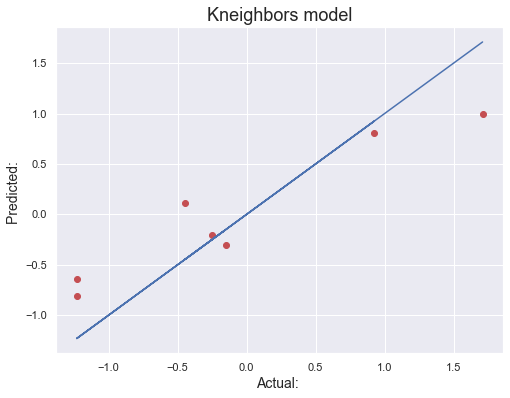

In [44]:

plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_kn, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Kneighbors model', fontsize = 18)
plt.show()

We are getting an R2 score of 80%

### Saving the Model

In [47]:
import joblib
knf=KNeighborsRegressor(leaf_size=1, p=2,n_neighbors=4,weights='uniform',algorithm='auto')
joblib.dump('knf', 'Baseball.obj')

['Baseball.obj']